In [1]:
from UTILITY_quickstart import *

In [2]:
#importedDefaultSettings = loadConfig("setLattice_configs/2024-10-14_twoBunch.yml")
importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch.yml")

In [3]:
csrTF = True
evalElement = "PENT"


inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]
bunchCount = importedDefaultSettings["bunchCount"]
tao = initializeTao(
    #inputBeamFilePathSuffix = '/beams/nmmToL0AFEND_2bunch_2024-02-16Clean/2024-02-16_2bunch_1e5Downsample_nudgeWeights.h5',
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    numMacroParticles=1e3,
)



Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR on
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 1000.0


In [4]:
# for L0BPhaseSet in np.arange(-50, 60, 10):
#     for L1PhaseSet in np.arange(-50, 60, 10):    
        
        
#         activeSettings = importedDefaultSettings | {
#             "L0BPhaseSet" : L0BPhaseSet, #-15.0
#             "L1PhaseSet" : L1PhaseSet,
#             "L2PhaseSet" : 20.0,
#         }
            
        
        
#         setLattice(tao, **activeSettings)
#         trackBeam(tao, **activeSettings)
        
#         evalElement = "PENT"
#         P = getBeamAtElement(tao, evalElement)
#         #display(plotMod(P, 'z', 'pz', bins=300))

#         print(f"""{L0BPhaseSet}, {L1PhaseSet}, {smallestIntervalImpliedSigma(P.z)}, {P.charge}""")

0.0001428169642268062, 1.5088e-09


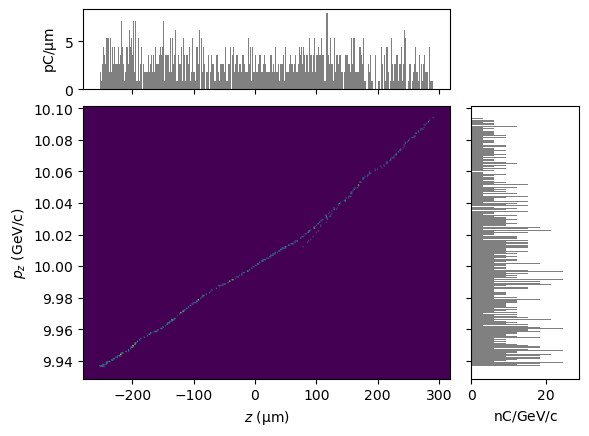

<Figure size 640x480 with 0 Axes>

In [5]:

activeSettings = importedDefaultSettings | {
    "L0BPhaseSet" : -50, #-15.0
    "L1PhaseSet" : -26,
    "L2PhaseSet" : -20,
}
    


setLattice(tao, **activeSettings)
trackBeam(tao, **activeSettings)

evalElement = "PENT"
P = getBeamAtElement(tao, evalElement)
print(f"""{smallestIntervalImpliedSigma(P.z)}, {P.charge}""")


# P = getBeamAtElement(tao, "BEGBC20")
# display(plotMod(P, 'z', 'pz', bins=300))

P = getBeamAtElement(tao, "PENT")
display(plotMod(P, 'z', 'pz', bins=300))


plt.clf()

In [6]:
def objective(params, tao):
    print(params)

    L0BPhaseSet, L1PhaseSet, L2PhaseSet = params
    try:
        activeSettings = importedDefaultSettings | {
            "L0BPhaseSet" : L0BPhaseSet,
            "L1PhaseSet" : L1PhaseSet,
            "L2PhaseSet" : L2PhaseSet,
        }


        setLattice(tao, **activeSettings)
        trackBeam(tao, **activeSettings)

        P = getBeamAtElement(tao, "PENT")
        error = smallestIntervalImpliedSigma(P.z)

        print(error)
    
    except: #If Bmad doesn't like the proposed solution, don't crash, give a bad number
        print("Exception")
        return 1e20


    return error

from scipy.optimize import minimize

bounds = [(-50, 50), (-50, 50), (-20, 20)]

# result = minimize(
#     objective, 
#     [-60, -60, 5], #Starting point
#     method='Nelder-Mead',
#     #method='L-BFGS-B',
#     #method="powell",
#     bounds = bounds,
#     args = (tao)
# )


from scipy.optimize import differential_evolution

# def wrapperDE(params):
#     return -1 * objective(params, tao)

result = differential_evolution(
            objective, 
            bounds,
            maxiter=500, 
            disp=True,
            polish = False, 
            popsize = 5,
            args = (tao,) #This comma is required!!
            #init = populationDE
        )

result

[-18.80528616  45.00816512  -4.14457082]
0.0016707796546841806
[ 4.87423183e+01 -3.81899999e+01  7.52576750e-03]
0.00031844657152435384
[31.33625391 11.22842872 11.53338307]
0.001186143154775795
[ -2.1154955  -20.50399602 -17.2387752 ]
0.0002714564057700174
[-45.25851328   6.91779191   6.98121207]
0.0011532549472017541
[-35.61411299  30.24510833  -3.63640943]
0.0013569142305983732
[14.37124292 24.63243337 16.4046255 ]
0.0018496633628075905
[-27.16222998  -0.84205071  18.52566139]
0.0012323837182382532
[ 39.38931399 -13.5283977    6.04768957]
0.0006905546335500649
[ 6.24216236 -5.65264629  2.49113176]
0.0008240019773695582
[-40.11494171 -36.10292484  14.41324727]
0.00036261528953017257
[ -6.01941855 -46.02447234 -18.88191733]
0.0002347554339567735
[ 17.60351031 -27.81312378  -7.61950817]
0.000371800961544803
[-16.54611762  22.4245342  -12.1990155 ]
0.000784952458272733
[29.06731335 41.42993445 -9.62318386]
0.001026897672986946
[  3.329177   -19.4468492   -5.84354429]
0.00046018801656328

             message: Optimization terminated successfully.
             success: True
                 fun: 0.00014333002767154238
                   x: [-4.960e+01 -2.698e+01 -1.974e+01]
                 nit: 29
                nfev: 450
          population: [[-4.960e+01 -2.698e+01 -1.974e+01]
                       [-4.997e+01 -2.648e+01 -1.979e+01]
                       ...
                       [-4.979e+01 -2.672e+01 -1.980e+01]
                       [-4.960e+01 -2.698e+01 -1.977e+01]]
 population_energies: [ 1.433e-04  1.461e-04 ...  1.460e-04  1.463e-04]